# Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score, accuracy_score, mean_squared_error, classification_report, make_scorer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, RobustScaler, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.svm import SVR

from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
dftest= pd.read_csv("/kaggle/input/playground-series-s4e11/test.csv")
dftest.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.000,Visakhapatnam,Working Professional,Judge,NaN,2.000,NaN,NaN,5.000,Less than 5 hours,Moderate,LLB,No,9.000,3.000,Yes
1,140701,Sanya,Female,58.000,Kolkata,Working Professional,Educational Consultant,NaN,2.000,NaN,NaN,4.000,Less than 5 hours,Moderate,B.Ed,No,6.000,4.000,No
2,140702,Yash,Male,53.000,Jaipur,Working Professional,Teacher,NaN,4.000,NaN,NaN,1.000,7-8 hours,Moderate,B.Arch,Yes,12.000,4.000,No
3,140703,Nalini,Female,23.000,Rajkot,Student,NaN,5.000,NaN,6.840,1.000,NaN,More than 8 hours,Moderate,BSc,Yes,10.000,4.000,No
4,140704,Shaurya,Male,47.000,Kalyan,Working Professional,Teacher,NaN,5.000,NaN,NaN,5.000,7-8 hours,Moderate,BCA,Yes,3.000,4.000,No


In [4]:
dftrain=pd.read_csv("/kaggle/input/playground-series-s4e11/train.csv")
dftrain.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.000,Ludhiana,Working Professional,Chef,NaN,5.000,NaN,NaN,2.000,More than 8 hours,Healthy,BHM,No,1.000,2.000,No,0
1,1,Vivan,Male,26.000,Varanasi,Working Professional,Teacher,NaN,4.000,NaN,NaN,3.000,Less than 5 hours,Unhealthy,LLB,Yes,7.000,3.000,No,1
2,2,Yuvraj,Male,33.000,Visakhapatnam,Student,NaN,5.000,NaN,8.970,2.000,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.000,1.000,No,1
3,3,Yuvraj,Male,22.000,Mumbai,Working Professional,Teacher,NaN,5.000,NaN,NaN,1.000,Less than 5 hours,Moderate,BBA,Yes,10.000,1.000,Yes,1
4,4,Rhea,Female,30.000,Kanpur,Working Professional,Business Analyst,NaN,1.000,NaN,NaN,1.000,5-6 hours,Unhealthy,BBA,Yes,9.000,4.000,Yes,0


In [5]:
df_merge=pd.concat([dftrain, dftest])
df=df_merge.copy()
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.000,Ludhiana,Working Professional,Chef,NaN,5.000,NaN,NaN,2.000,More than 8 hours,Healthy,BHM,No,1.000,2.000,No,0.000
1,1,Vivan,Male,26.000,Varanasi,Working Professional,Teacher,NaN,4.000,NaN,NaN,3.000,Less than 5 hours,Unhealthy,LLB,Yes,7.000,3.000,No,1.000
2,2,Yuvraj,Male,33.000,Visakhapatnam,Student,NaN,5.000,NaN,8.970,2.000,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.000,1.000,No,1.000
3,3,Yuvraj,Male,22.000,Mumbai,Working Professional,Teacher,NaN,5.000,NaN,NaN,1.000,Less than 5 hours,Moderate,BBA,Yes,10.000,1.000,Yes,1.000
4,4,Rhea,Female,30.000,Kanpur,Working Professional,Business Analyst,NaN,1.000,NaN,NaN,1.000,5-6 hours,Unhealthy,BBA,Yes,9.000,4.000,Yes,0.000


In [6]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Duplicated Values #####################")
    print(dataframe.duplicated().sum())
    print("##################### Missing Values #####################")
    print(dataframe.isnull().sum())
    print("##################### Number of Unique Values #####################")
    print(df.nunique())

In [7]:
check_df(df)

##################### Shape #####################
(234500, 20)
##################### Types #####################
id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Famil

In [8]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    
    return cat_cols, num_cols, cat_but_car

In [9]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=14, car_th=50)

print("#############")
print(f"Cat_Cols : {cat_cols}")
print("#############")
print(f"Num_Cols : {num_cols}")
print("#############")
print(f"Cat_But_Car : {cat_but_car}")

Observations: 234500
Variables: 20
cat_cols: 13
num_cols: 3
cat_but_car: 4
num_but_cat: 7
#############
Cat_Cols : ['Gender', 'Working Professional or Student', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']
#############
Num_Cols : ['id', 'Age', 'CGPA']
#############
Cat_But_Car : ['Name', 'City', 'Profession', 'Degree']


In [10]:
num_cols=[col for col in num_cols if col not in ["id"]]
cat_cols=[col for col in cat_cols if col not in ["Depression"]]

# Cat Cols Analysis

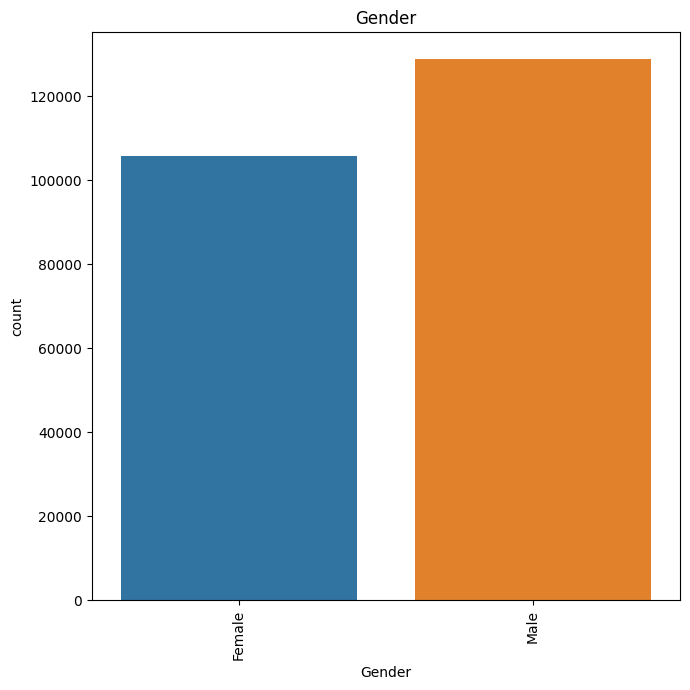

         count  ratio
Gender               
Male    128726 54.894
Female  105774 45.106
###################################################################################################################


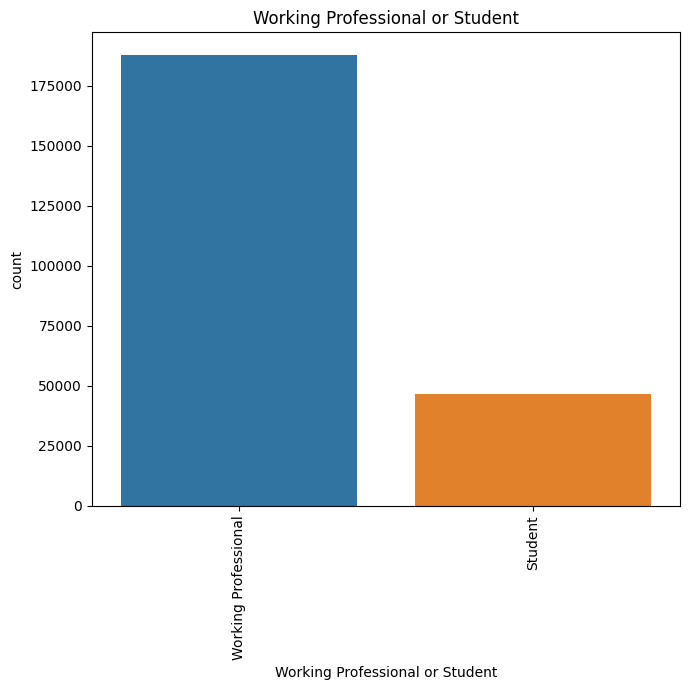

                                  count  ratio
Working Professional or Student               
Working Professional             187827 80.097
Student                           46673 19.903
###################################################################################################################


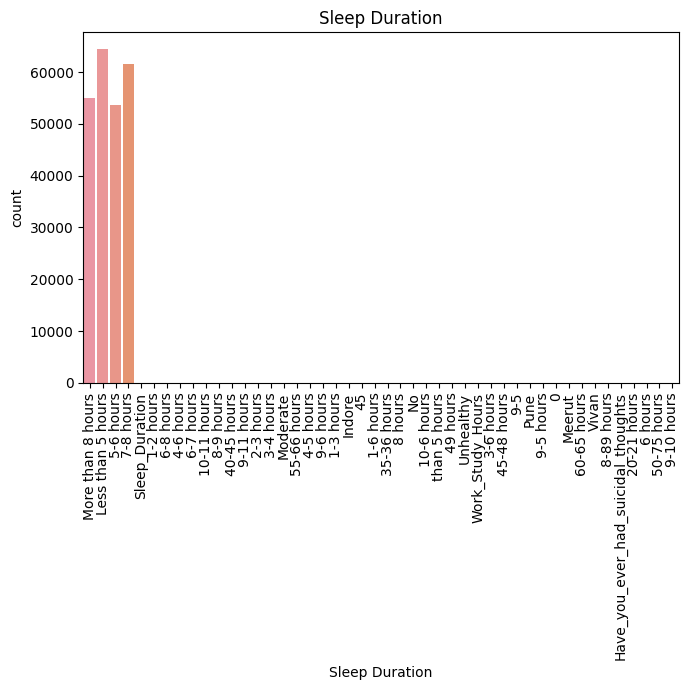

                                     count  ratio
Sleep Duration                                   
Less than 5 hours                    64445 27.482
7-8 hours                            61460 26.209
More than 8 hours                    54916 23.418
5-6 hours                            53546 22.834
6-7 hours                               15  0.006
3-4 hours                               15  0.006
4-5 hours                               13  0.006
2-3 hours                                9  0.004
8-9 hours                                8  0.003
4-6 hours                                7  0.003
1-6 hours                                6  0.003
No                                       4  0.002
6-8 hours                                4  0.002
9-5                                      3  0.001
9-11 hours                               3  0.001
1-2 hours                                3  0.001
Unhealthy                                3  0.001
9-5 hours                                3  0.001


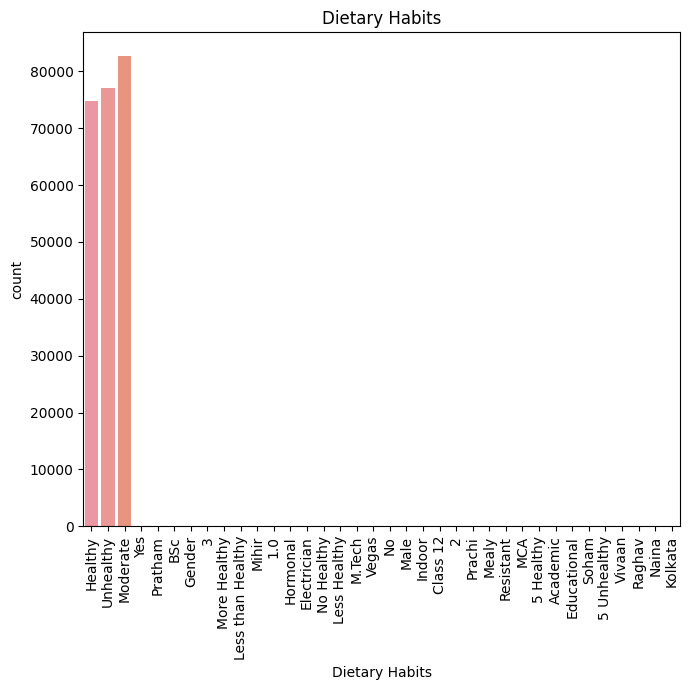

                   count  ratio
Dietary Habits                 
Moderate           82723 35.276
Unhealthy          77013 32.841
Healthy            74707 31.858
No                     8  0.003
More Healthy           4  0.002
Indoor                 2  0.001
Male                   2  0.001
Yes                    2  0.001
1.0                    2  0.001
Less Healthy           2  0.001
Academic               1  0.000
Resistant              1  0.000
MCA                    1  0.000
5 Healthy              1  0.000
Educational            1  0.000
Prachi                 1  0.000
Soham                  1  0.000
5 Unhealthy            1  0.000
Vivaan                 1  0.000
Raghav                 1  0.000
Naina                  1  0.000
Mealy                  1  0.000
Pratham                1  0.000
2                      1  0.000
Class 12               1  0.000
BSc                    1  0.000
Vegas                  1  0.000
M.Tech                 1  0.000
No Healthy             1  0.000
Electric

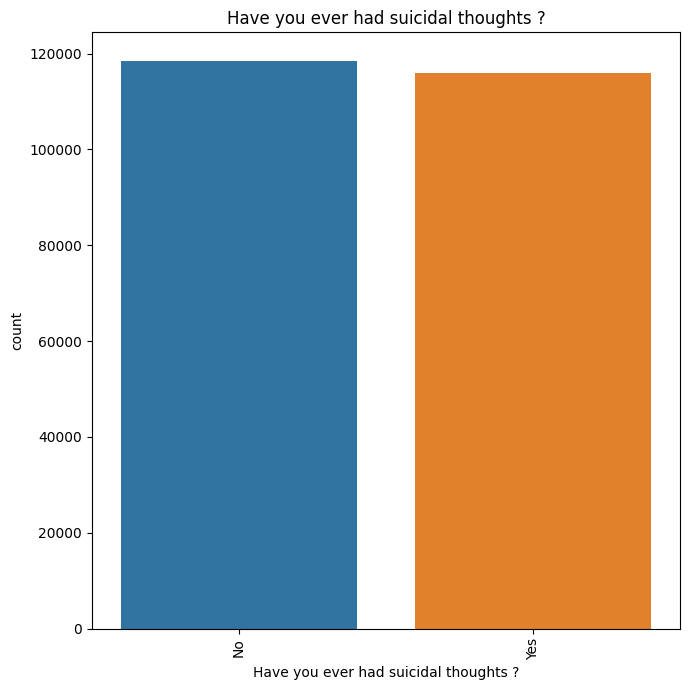

                                        count  ratio
Have you ever had suicidal thoughts ?               
No                                     118513 50.539
Yes                                    115987 49.461
###################################################################################################################


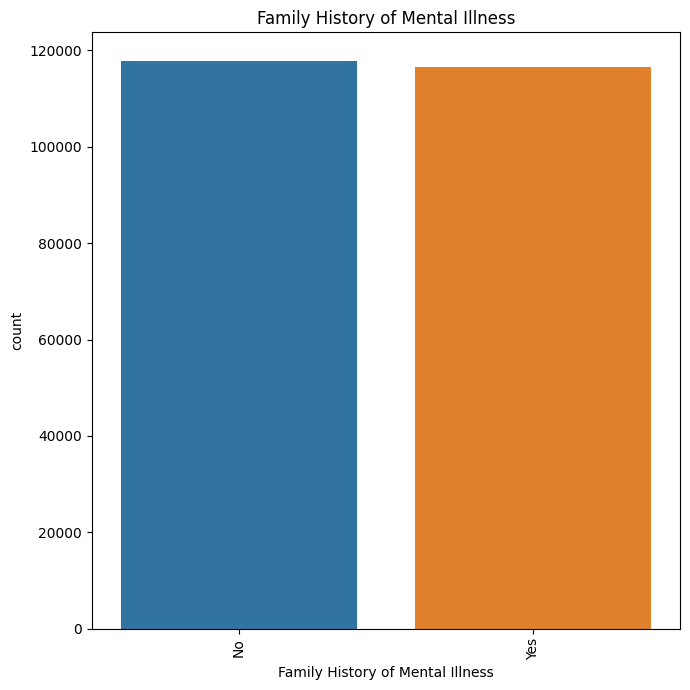

                                   count  ratio
Family History of Mental Illness               
No                                117876 50.267
Yes                               116624 49.733
###################################################################################################################


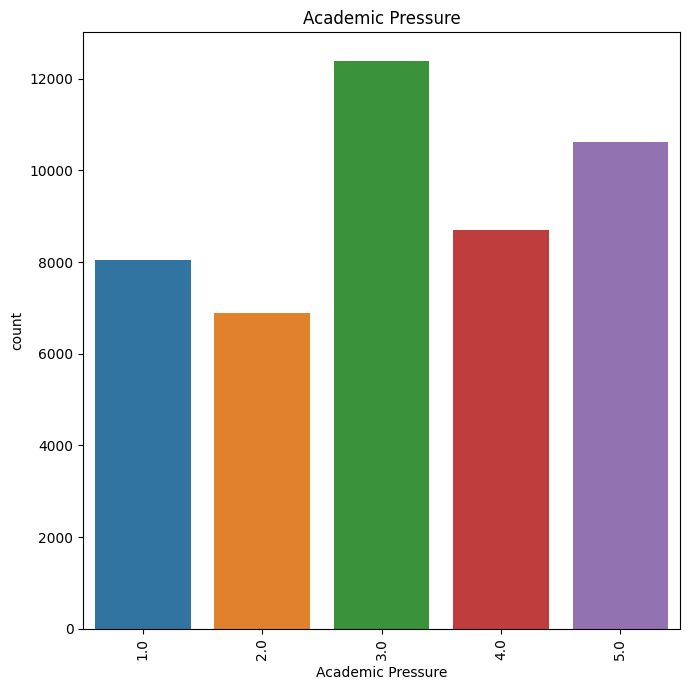

                   count  ratio
Academic Pressure              
3.000              12393  5.285
5.000              10617  4.528
4.000               8709  3.714
1.000               8053  3.434
2.000               6892  2.939
###################################################################################################################


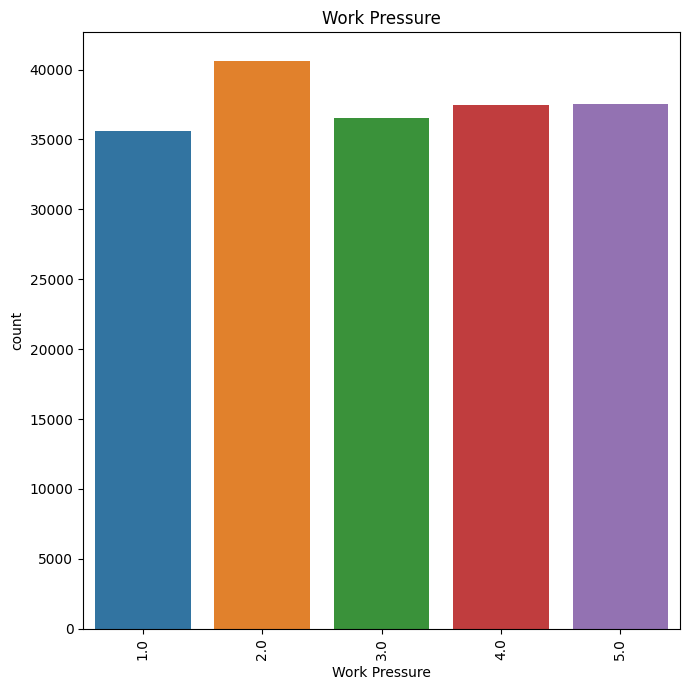

               count  ratio
Work Pressure              
2.000          40628 17.325
5.000          37549 16.012
4.000          37486 15.986
3.000          36549 15.586
1.000          35592 15.178
###################################################################################################################


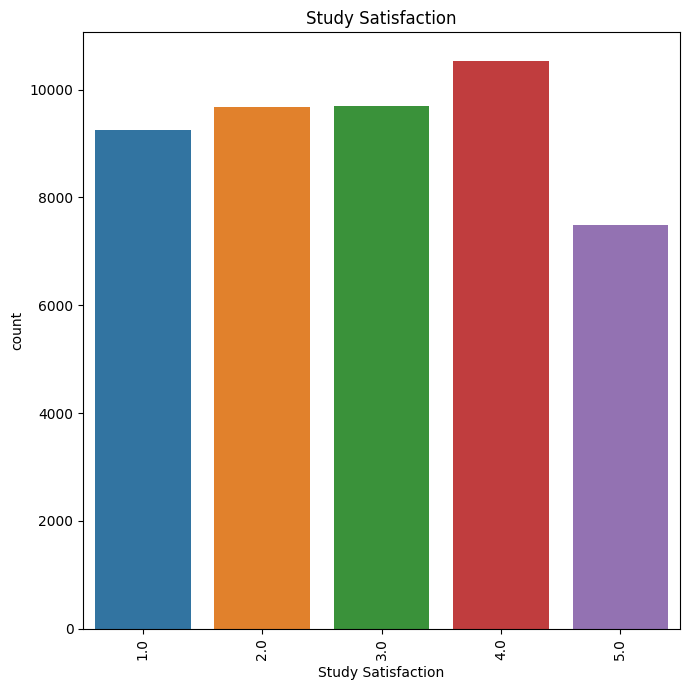

                    count  ratio
Study Satisfaction              
4.000               10535  4.493
3.000                9703  4.138
2.000                9678  4.127
1.000                9256  3.947
5.000                7492  3.195
###################################################################################################################


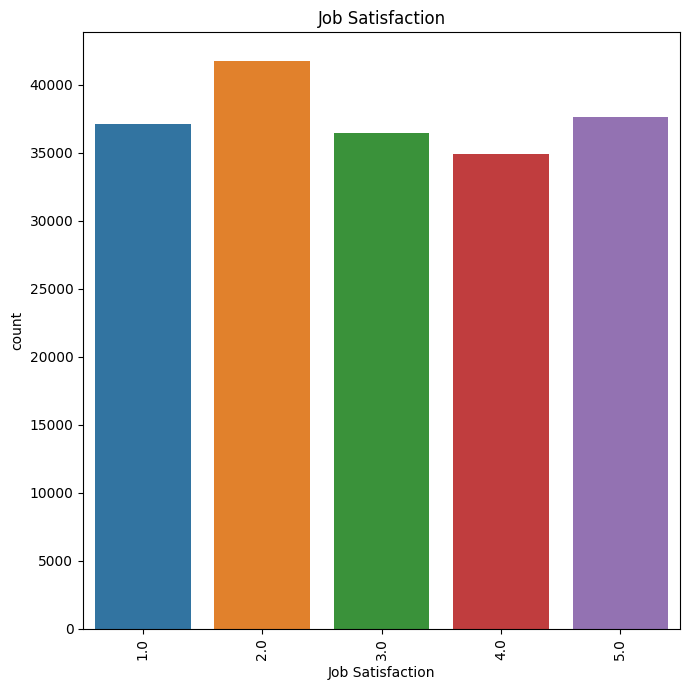

                  count  ratio
Job Satisfaction              
2.000             41754 17.806
5.000             37639 16.051
1.000             37117 15.828
3.000             36415 15.529
4.000             34891 14.879
###################################################################################################################


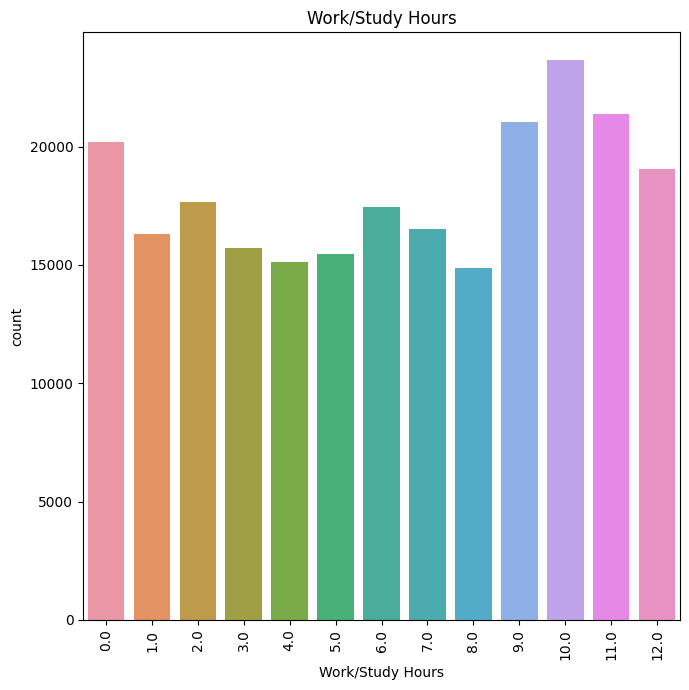

                  count  ratio
Work/Study Hours              
10.000            23649 10.085
11.000            21387  9.120
9.000             21026  8.966
0.000             20198  8.613
12.000            19066  8.130
2.000             17678  7.539
6.000             17461  7.446
7.000             16518  7.044
1.000             16327  6.962
3.000             15735  6.710
5.000             15455  6.591
4.000             15144  6.458
8.000             14856  6.335
###################################################################################################################


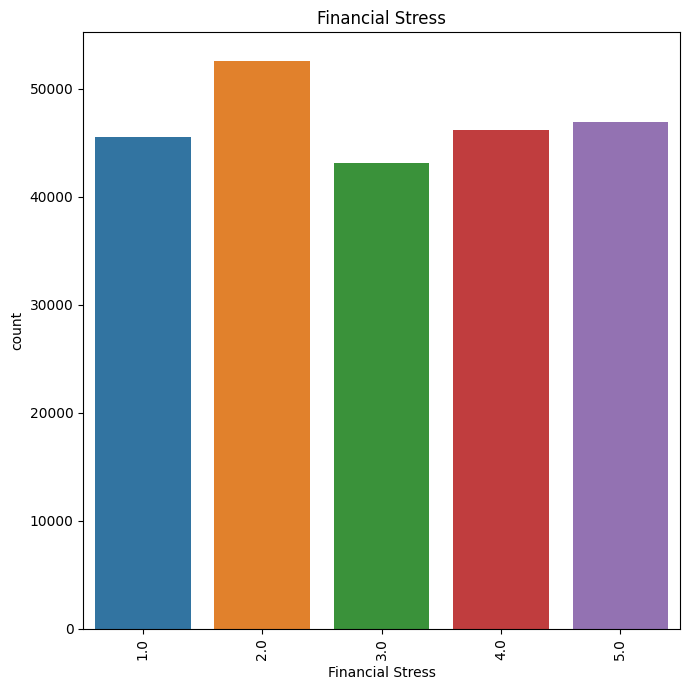

                  count  ratio
Financial Stress              
2.000             52602 22.432
5.000             46973 20.031
4.000             46218 19.709
1.000             45552 19.425
3.000             43151 18.401
###################################################################################################################


In [11]:
for col in cat_cols:
    plt.figure(figsize=(7,7)) 
    
    sns.countplot(x=df[col])
    plt.title(f'{col}')
    plt.xticks(rotation=90)
    plt.tight_layout() 
    plt.show() 
    
    print(pd.DataFrame({"count" : df[col].value_counts(),
                       "ratio" : 100*df[col].value_counts() / len(df)}))
    print("###################################################################################################################")

# Num Cols Analysis

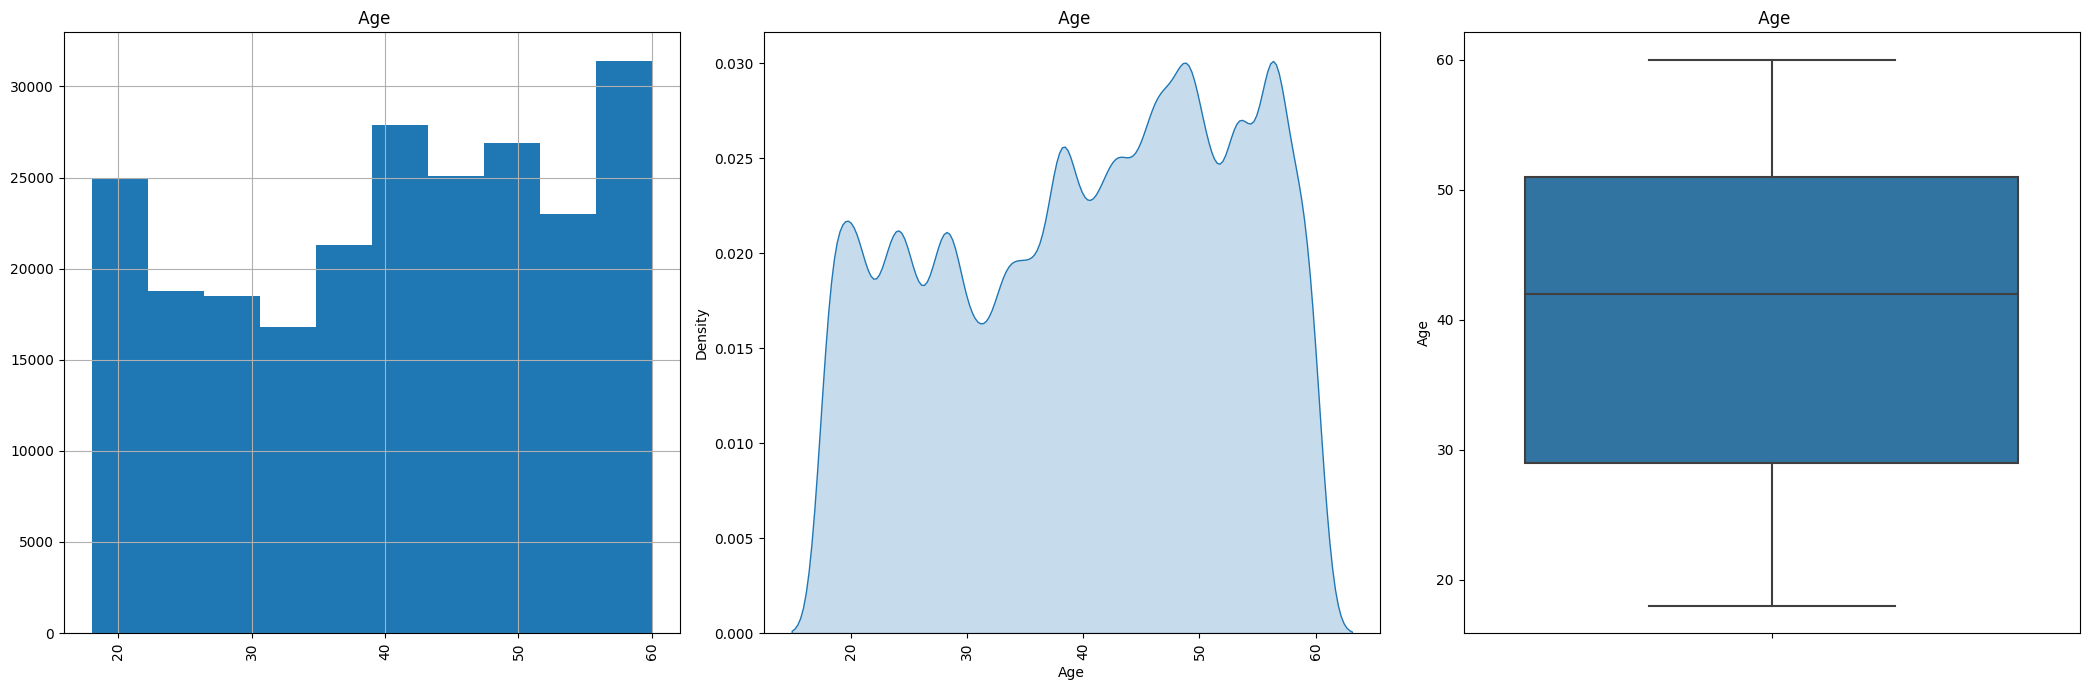

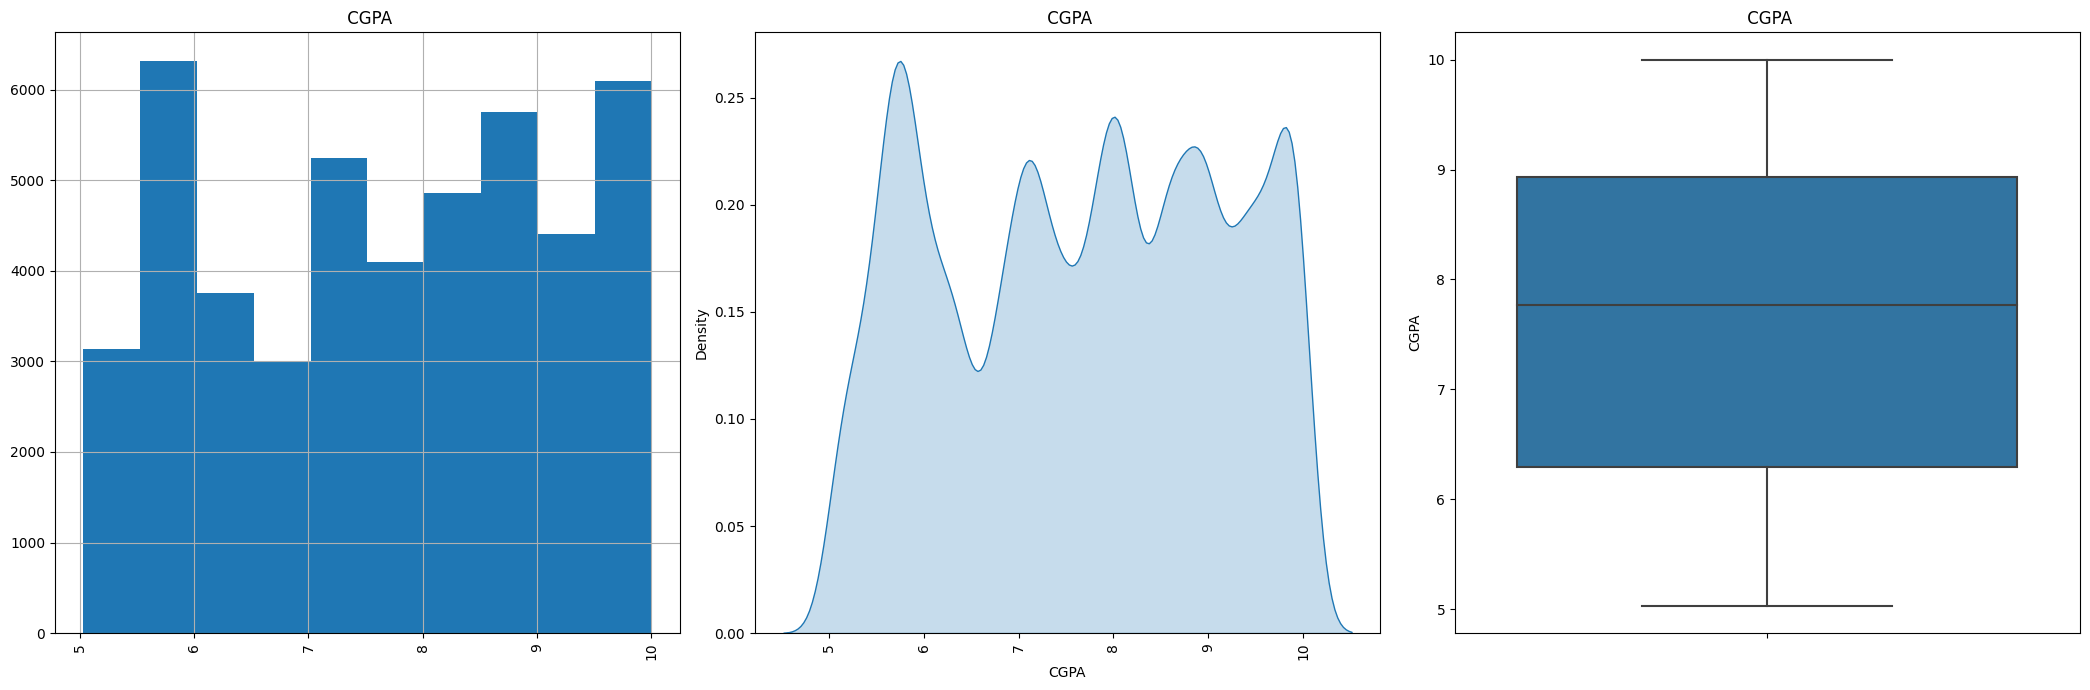

In [12]:
for col in num_cols:
    plt.figure(figsize=(21,7))
    
    plt.subplot(1,3,1)
    df[col].hist()
    plt.title(f' {col}')
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,2)
    sns.kdeplot(df[col], fill=True)
    plt.title(f' {col}')
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=col, data=df)
    plt.title(f' {col}')
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

# Data Cleaning

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,234500.000,117249.500,67694.463,0.000,58624.750,117249.500,175874.250,234499.000
Age,234500.000,40.362,12.388,18.000,29.000,42.000,51.000,60.000
Academic Pressure,46664.000,3.149,1.383,1.000,2.000,3.000,4.000,5.000
Work Pressure,187804.000,3.004,1.405,1.000,2.000,3.000,4.000,5.000
CGPA,46664.000,7.665,1.465,5.030,6.290,7.770,8.930,10.000
Study Satisfaction,46664.000,2.943,1.366,1.000,2.000,3.000,4.000,5.000
Job Satisfaction,187816.000,2.969,1.414,1.000,2.000,3.000,4.000,5.000
Work/Study Hours,234500.000,6.251,3.855,0.000,3.000,6.000,10.000,12.000
Financial Stress,234496.000,2.985,1.414,1.000,2.000,3.000,4.000,5.000
Depression,140700.000,0.182,0.386,0.000,0.000,0.000,0.000,1.000


In [14]:
print(df.nunique())
print(df.shape)

id                                       234500
Name                                        554
Gender                                        2
Age                                          44
City                                        124
Working Professional or Student               2
Profession                                   81
Academic Pressure                             5
Work Pressure                                 5
CGPA                                        338
Study Satisfaction                            5
Job Satisfaction                              5
Sleep Duration                               46
Dietary Habits                               36
Degree                                      156
Have you ever had suicidal thoughts ?         2
Work/Study Hours                             13
Financial Stress                              5
Family History of Mental Illness              2
Depression                                    2
dtype: int64
(234500, 20)


In [15]:
# Empty rows in Degree, Dietary Habits, Financial Stress columns will be filled.

subset=["Degree", "Dietary Habits", "Financial Stress"]

for col in subset:
    df[col]=df[col].fillna(df["Degree"].mode()[0])

df.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                61262
Academic Pressure                        187836
Work Pressure                             46696
CGPA                                     187836
Study Satisfaction                       187836
Job Satisfaction                          46684
Sleep Duration                                0
Dietary Habits                                0
Degree                                        0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              0
Family History of Mental Illness              0
Depression                                93800
dtype: int64

In [16]:
# Replacing data which has less then 0.7 ratio

rare_labels_dict = {}

for col in cat_cols:
    ratio = 100 * df[col].value_counts() / len(df)
    rare_labels = ratio[ratio < 0.7].index
    rare_labels_dict[col] = rare_labels
 
for col, rare_labels in rare_labels_dict.items():
    most_frequent_label = df[col].mode()[0]
    df[col] = df[col].replace(rare_labels, most_frequent_label)

In [17]:
print(df.nunique())
print(df.shape)

id                                       234500
Name                                        554
Gender                                        2
Age                                          44
City                                        124
Working Professional or Student               2
Profession                                   81
Academic Pressure                             5
Work Pressure                                 5
CGPA                                        338
Study Satisfaction                            5
Job Satisfaction                              5
Sleep Duration                                4
Dietary Habits                                3
Degree                                      156
Have you ever had suicidal thoughts ?         2
Work/Study Hours                             13
Financial Stress                              5
Family History of Mental Illness              2
Depression                                    2
dtype: int64
(234500, 20)


# Missing Values

In [18]:
df.head(20)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.000,Ludhiana,Working Professional,Chef,NaN,5.000,NaN,NaN,2.000,More than 8 hours,Healthy,BHM,No,1.000,2.000,No,0.000
1,1,Vivan,Male,26.000,Varanasi,Working Professional,Teacher,NaN,4.000,NaN,NaN,3.000,Less than 5 hours,Unhealthy,LLB,Yes,7.000,3.000,No,1.000
2,2,Yuvraj,Male,33.000,Visakhapatnam,Student,NaN,5.000,NaN,8.970,2.000,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.000,1.000,No,1.000
3,3,Yuvraj,Male,22.000,Mumbai,Working Professional,Teacher,NaN,5.000,NaN,NaN,1.000,Less than 5 hours,Moderate,BBA,Yes,10.000,1.000,Yes,1.000
4,4,Rhea,Female,30.000,Kanpur,Working Professional,Business Analyst,NaN,1.000,NaN,NaN,1.000,5-6 hours,Unhealthy,BBA,Yes,9.000,4.000,Yes,0.000
5,5,Vani,Female,59.000,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.000,NaN,NaN,5.000,5-6 hours,Healthy,MCA,No,7.000,5.000,No,0.000
6,6,Ritvik,Male,47.000,Thane,Working Professional,Chemist,NaN,5.000,NaN,NaN,2.000,7-8 hours,Moderate,MD,No,6.000,2.000,No,0.000
7,7,Rajveer,Male,38.000,Nashik,Working Professional,Teacher,NaN,3.000,NaN,NaN,4.000,7-8 hours,Unhealthy,B.Pharm,No,10.000,3.000,Yes,0.000
8,8,Aishwarya,Female,24.000,Bangalore,Student,NaN,2.000,NaN,5.900,5.000,NaN,5-6 hours,Moderate,BSc,No,3.000,2.000,Yes,0.000
9,9,Simran,Female,42.000,Patna,Working Professional,Electrician,NaN,4.000,NaN,NaN,1.000,5-6 hours,Healthy,ME,Yes,7.000,2.000,Yes,0.000


In [19]:
for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()}")

id: 0
Name: 0
Gender: 0
Age: 0
City: 0
Working Professional or Student: 0
Profession: 61262
Academic Pressure: 187836
Work Pressure: 46696
CGPA: 187836
Study Satisfaction: 187836
Job Satisfaction: 46684
Sleep Duration: 0
Dietary Habits: 0
Degree: 0
Have you ever had suicidal thoughts ?: 0
Work/Study Hours: 0
Financial Stress: 0
Family History of Mental Illness: 0
Depression: 93800


In [20]:
# Filling Profession column

df["Profession"] = df.apply(lambda x: x["Profession"] if x["Working Professional or Student"] == "Working Professional" else "Student", axis=1)
df.head(20)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.000,Ludhiana,Working Professional,Chef,NaN,5.000,NaN,NaN,2.000,More than 8 hours,Healthy,BHM,No,1.000,2.000,No,0.000
1,1,Vivan,Male,26.000,Varanasi,Working Professional,Teacher,NaN,4.000,NaN,NaN,3.000,Less than 5 hours,Unhealthy,LLB,Yes,7.000,3.000,No,1.000
2,2,Yuvraj,Male,33.000,Visakhapatnam,Student,Student,5.000,NaN,8.970,2.000,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.000,1.000,No,1.000
3,3,Yuvraj,Male,22.000,Mumbai,Working Professional,Teacher,NaN,5.000,NaN,NaN,1.000,Less than 5 hours,Moderate,BBA,Yes,10.000,1.000,Yes,1.000
4,4,Rhea,Female,30.000,Kanpur,Working Professional,Business Analyst,NaN,1.000,NaN,NaN,1.000,5-6 hours,Unhealthy,BBA,Yes,9.000,4.000,Yes,0.000
5,5,Vani,Female,59.000,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.000,NaN,NaN,5.000,5-6 hours,Healthy,MCA,No,7.000,5.000,No,0.000
6,6,Ritvik,Male,47.000,Thane,Working Professional,Chemist,NaN,5.000,NaN,NaN,2.000,7-8 hours,Moderate,MD,No,6.000,2.000,No,0.000
7,7,Rajveer,Male,38.000,Nashik,Working Professional,Teacher,NaN,3.000,NaN,NaN,4.000,7-8 hours,Unhealthy,B.Pharm,No,10.000,3.000,Yes,0.000
8,8,Aishwarya,Female,24.000,Bangalore,Student,Student,2.000,NaN,5.900,5.000,NaN,5-6 hours,Moderate,BSc,No,3.000,2.000,Yes,0.000
9,9,Simran,Female,42.000,Patna,Working Professional,Electrician,NaN,4.000,NaN,NaN,1.000,5-6 hours,Healthy,ME,Yes,7.000,2.000,Yes,0.000


In [21]:
df["Profession"].isnull().sum()

14649

In [22]:
# Filling Profession column

df["Profession"]=df["Profession"].fillna("Unknown")
df["Profession"].isnull().sum()

0

In [23]:
profession_counts = df["Profession"].value_counts()
print(profession_counts)

Profession
Student                   46683
Teacher                   41281
Unknown                   14649
Content Writer            12997
Architect                  7344
Consultant                 7149
HR Manager                 6622
Pharmacist                 6546
Doctor                     5450
Business Analyst           5347
Chemist                    4933
Entrepreneur               4901
Chef                       4702
Educational Consultant     4678
Data Scientist             3971
Researcher                 3823
Lawyer                     3708
Customer Support           3477
Pilot                      3361
Marketing Manager          3260
Travel Consultant          3048
Judge                      2900
Manager                    2890
Sales Executive            2878
Plumber                    2871
Electrician                2702
Financial Analyst          2622
Software Engineer          2512
Civil Engineer             2406
UX/UI Designer             2364
Digital Marketer           23

In [24]:
df["Profession"]=df["Profession"].replace("Finanancial Analyst", "Financial Analyst")

rare_professions = profession_counts[profession_counts < 6].index
df["Profession"] = df["Profession"].replace(rare_professions, 'Other')

df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.000,Ludhiana,Working Professional,Chef,NaN,5.000,NaN,NaN,2.000,More than 8 hours,Healthy,BHM,No,1.000,2.000,No,0.000
1,1,Vivan,Male,26.000,Varanasi,Working Professional,Teacher,NaN,4.000,NaN,NaN,3.000,Less than 5 hours,Unhealthy,LLB,Yes,7.000,3.000,No,1.000
2,2,Yuvraj,Male,33.000,Visakhapatnam,Student,Student,5.000,NaN,8.970,2.000,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.000,1.000,No,1.000
3,3,Yuvraj,Male,22.000,Mumbai,Working Professional,Teacher,NaN,5.000,NaN,NaN,1.000,Less than 5 hours,Moderate,BBA,Yes,10.000,1.000,Yes,1.000
4,4,Rhea,Female,30.000,Kanpur,Working Professional,Business Analyst,NaN,1.000,NaN,NaN,1.000,5-6 hours,Unhealthy,BBA,Yes,9.000,4.000,Yes,0.000
5,5,Vani,Female,59.000,Ahmedabad,Working Professional,Financial Analyst,NaN,2.000,NaN,NaN,5.000,5-6 hours,Healthy,MCA,No,7.000,5.000,No,0.000
6,6,Ritvik,Male,47.000,Thane,Working Professional,Chemist,NaN,5.000,NaN,NaN,2.000,7-8 hours,Moderate,MD,No,6.000,2.000,No,0.000
7,7,Rajveer,Male,38.000,Nashik,Working Professional,Teacher,NaN,3.000,NaN,NaN,4.000,7-8 hours,Unhealthy,B.Pharm,No,10.000,3.000,Yes,0.000
8,8,Aishwarya,Female,24.000,Bangalore,Student,Student,2.000,NaN,5.900,5.000,NaN,5-6 hours,Moderate,BSc,No,3.000,2.000,Yes,0.000
9,9,Simran,Female,42.000,Patna,Working Professional,Electrician,NaN,4.000,NaN,NaN,1.000,5-6 hours,Healthy,ME,Yes,7.000,2.000,Yes,0.000


In [25]:
# skewness to decide which imputer to use for filling missing values for "Academic Pressure","Work Pressure", "CGPA", "Study Satisfaction", "Job Satisfaction" columns

skewness = df.skew(numeric_only=True)

print(skewness)

id                   -0.000
Age                  -0.214
Academic Pressure    -0.143
Work Pressure         0.015
CGPA                 -0.079
Study Satisfaction    0.014
Job Satisfaction      0.061
Work/Study Hours     -0.127
Financial Stress      0.040
Depression            1.651
dtype: float64


In [26]:
control=["Academic Pressure","Work Pressure", "CGPA", "Study Satisfaction", "Job Satisfaction"]
df.groupby("Working Professional or Student")[control].apply(lambda x: x.isnull().sum())

,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction
Working Professional or Student,,,,,
Student,16,46666,18,18,46658
Working Professional,187820,30,187818,187818,26


In [27]:
# Filling the NaN values in the 'Academic Pressure' column with the median (scewness: 2.112), where the 'Working Professional or Student' value is 'Student'

median_academic_pressure = df[df["Working Professional or Student"] == "Student"]["Academic Pressure"].median()
df.loc[(df["Working Professional or Student"] == "Student") & (df["Academic Pressure"].isnull()), "Academic Pressure"] = median_academic_pressure


# Filling the NaN values in the 'Academic Pressure' column with "0", where the 'Working Professional or Student' value is 'Working Professional'

df.loc[(df["Working Professional or Student"] == "Working Professional") & (df["Academic Pressure"].isnull()), "Academic Pressure"] = 0


# Control

df.groupby("Working Professional or Student")["Academic Pressure"].apply(lambda x: x.isnull().sum())

Working Professional or Student
Student                 0
Working Professional    0
Name: Academic Pressure, dtype: int64

In [28]:
# Filling the NaN values in the 'Work Pressure' column with the mean (scewness: 0.051), where the 'Working Professional or Student' value is 'Working Professional'

mean_work_pressure = int(df[df["Working Professional or Student"] == "Working Professional"]["Work Pressure"].mean())
df.loc[(df["Working Professional or Student"] == "Working Professional") & (df["Work Pressure"].isnull()), "Work Pressure"] = mean_work_pressure


# Filling the NaN values in the 'Work Pressure' column with "0", where the 'Working Professional or Student' value is 'Student'

df.loc[(df["Working Professional or Student"] == "Student") & (df["Work Pressure"].isnull()), "Work Pressure"] = 0


# Control

df.groupby("Working Professional or Student")["Work Pressure"].apply(lambda x: x.isnull().sum())

Working Professional or Student
Student                 0
Working Professional    0
Name: Work Pressure, dtype: int64

In [29]:
# Filling the NaN values in the 'CGPA' column with the mean (scewness: 0.051), where the 'Working Professional or Student' value is 'Student'

mean_CGPA = int(df[df["Working Professional or Student"] == "Student"]["CGPA"].mean())
df.loc[(df["Working Professional or Student"] == "Student") & (df["CGPA"].isnull()), "CGPA"] = mean_CGPA


# Filling the NaN values in the 'CGPA' column with "0", where the 'Working Professional or Student' value is 'Working Professional'

df.loc[(df["Working Professional or Student"] == "Working Professional") & (df["CGPA"].isnull()), "CGPA"] = 0


# Control

df.groupby("Working Professional or Student")["CGPA"].apply(lambda x: x.isnull().sum())

Working Professional or Student
Student                 0
Working Professional    0
Name: CGPA, dtype: int64

In [30]:
# Filling the NaN values in the 'Study Satisfaction' column with the mean (scewness: 0.014), where the 'Working Professional or Student' value is 'Student'

mean_ss = int(df[df["Working Professional or Student"] == "Student"]["Study Satisfaction"].mean())
df.loc[(df["Working Professional or Student"] == "Student") & (df["Study Satisfaction"].isnull()), "Study Satisfaction"] = mean_ss


# Filling the NaN values in the 'CGPA' column with "0", where the 'Working Professional or Student' value is 'Working Professional'

df.loc[(df["Working Professional or Student"] == "Working Professional") & (df["Study Satisfaction"].isnull()), "Study Satisfaction"] = 0


# Control

df.groupby("Working Professional or Student")["Study Satisfaction"].apply(lambda x: x.isnull().sum())

Working Professional or Student
Student                 0
Working Professional    0
Name: Study Satisfaction, dtype: int64

In [31]:
# Filling the NaN values in the 'Job Satisfaction' column with the mean (scewness: 0.061), where the 'Working Professional or Student' value is 'Working Professional'

mean_js = int(df[df["Working Professional or Student"] == "Working Professional"]["Job Satisfaction"].mean())
df.loc[(df["Working Professional or Student"] == "Working Professional") & (df["Job Satisfaction"].isnull()), "Job Satisfaction"] = mean_js


# Filling the NaN values in the 'Work Pressure' column with "0", where the 'Working Professional or Student' value is 'Student'

df.loc[(df["Working Professional or Student"] == "Student") & (df["Job Satisfaction"].isnull()), "Job Satisfaction"] = 0


# Control

df.groupby("Working Professional or Student")["Job Satisfaction"].apply(lambda x: x.isnull().sum())

Working Professional or Student
Student                 0
Working Professional    0
Name: Job Satisfaction, dtype: int64

In [32]:
# Control

for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()}")

id: 0
Name: 0
Gender: 0
Age: 0
City: 0
Working Professional or Student: 0
Profession: 0
Academic Pressure: 0
Work Pressure: 0
CGPA: 0
Study Satisfaction: 0
Job Satisfaction: 0
Sleep Duration: 0
Dietary Habits: 0
Degree: 0
Have you ever had suicidal thoughts ?: 0
Work/Study Hours: 0
Financial Stress: 0
Family History of Mental Illness: 0
Depression: 93800


# Future Engineering

In [33]:
# Stress point

df["Stress Point"]= df["Academic Pressure"] + df["Work Pressure"] + df["Financial Stress"]

In [34]:
# Defining the list of Urban and Rural Cities with ChatGPT based on official urban/rural classification of India

urban_cities = ['Mumbai', 'Delhi', 'Bangalore', 'Hyderabad', 'Chennai', 'Kolkata', 'Pune', 'Ahmedabad', 'Surat', 'Jaipur', 'Lucknow', 'Kanpur', 'Nagpur', 'Indore', 'Kochi', 'Bhopal', 'Visakhapatnam', 'Vadodara', 'Thane', 'Nashik', 'Patna', 'Agra', 'Chandigarh', 'Noida', 'Faridabad', 'Gurgaon', 'Madurai', 'Coimbatore']
rural_cities = ['Morena', 'Vidhi', 'Krishna', 'Keshav', 'Ishanabad', 'Malyansh', 'Chhavi', 'Tushar', 'Raghavendra', 'Aishwarya', 'Pratyush', 'Mira']

df['City Type'] = df['City'].apply(lambda x: 'Urban' if x in urban_cities else 'Rural')

df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Stress Point,City Type
0,0,Aaradhya,Female,49.000,Ludhiana,Working Professional,Chef,0.000,5.000,0.000,0.000,2.000,More than 8 hours,Healthy,BHM,No,1.000,2.000,No,0.000,7.000,Rural
1,1,Vivan,Male,26.000,Varanasi,Working Professional,Teacher,0.000,4.000,0.000,0.000,3.000,Less than 5 hours,Unhealthy,LLB,Yes,7.000,3.000,No,1.000,7.000,Rural
2,2,Yuvraj,Male,33.000,Visakhapatnam,Student,Student,5.000,0.000,8.970,2.000,0.000,5-6 hours,Healthy,B.Pharm,Yes,3.000,1.000,No,1.000,6.000,Urban
3,3,Yuvraj,Male,22.000,Mumbai,Working Professional,Teacher,0.000,5.000,0.000,0.000,1.000,Less than 5 hours,Moderate,BBA,Yes,10.000,1.000,Yes,1.000,6.000,Urban
4,4,Rhea,Female,30.000,Kanpur,Working Professional,Business Analyst,0.000,1.000,0.000,0.000,1.000,5-6 hours,Unhealthy,BBA,Yes,9.000,4.000,Yes,0.000,5.000,Urban
5,5,Vani,Female,59.000,Ahmedabad,Working Professional,Financial Analyst,0.000,2.000,0.000,0.000,5.000,5-6 hours,Healthy,MCA,No,7.000,5.000,No,0.000,7.000,Urban
6,6,Ritvik,Male,47.000,Thane,Working Professional,Chemist,0.000,5.000,0.000,0.000,2.000,7-8 hours,Moderate,MD,No,6.000,2.000,No,0.000,7.000,Urban
7,7,Rajveer,Male,38.000,Nashik,Working Professional,Teacher,0.000,3.000,0.000,0.000,4.000,7-8 hours,Unhealthy,B.Pharm,No,10.000,3.000,Yes,0.000,6.000,Urban
8,8,Aishwarya,Female,24.000,Bangalore,Student,Student,2.000,0.000,5.900,5.000,0.000,5-6 hours,Moderate,BSc,No,3.000,2.000,Yes,0.000,4.000,Urban
9,9,Simran,Female,42.000,Patna,Working Professional,Electrician,0.000,4.000,0.000,0.000,1.000,5-6 hours,Healthy,ME,Yes,7.000,2.000,Yes,0.000,6.000,Urban


In [35]:
# Monthly salary column:

# Dictionary of average monthly salaries in India for each profession (in INR)
salaries_by_prof = {
    'Chef': 60000,
    'Teacher': 30000,
    'Unknown': 68000,  # mean of salaries
    'Business Analyst': 90000,
    'Financial Analyst': 80000,
    'Chemist': 40000,
    'Electrician': 25000,
    'Software Engineer': 120000,
    'Data Scientist': 150000,
    'Plumber': 20000,
    'Marketing Manager': 70000,
    'Accountant': 35000,
    'Entrepreneur': 100000,  
    'HR Manager': 60000,
    'UX/UI Designer': 60000,
    'Content Writer': 25000,
    'Educational Consultant': 45000,
    'Civil Engineer': 60000,
    'Manager': 80000,
    'Pharmacist': 40000,
    'Architect': 70000,
    'Mechanical Engineer': 60000,
    'Customer Support': 25000,
    'Consultant': 70000,
    'Judge': 100000,
    'Researcher': 50000,
    'Pilot': 200000,
    'Graphic Designer': 30000,
    'Travel Consultant': 30000,
    'Digital Marketer': 40000,
    'Lawyer': 80000,
    'Research Analyst': 60000,
    'Sales Executive': 30000,
    'Doctor': 150000,
    'Unemployed': 0,
    'Investment Banker': 250000,
    'Other': 35000,
    'Student': 0,  # Students typically don't earn a salary unless part-time
    'Academic': 50000,
    'Working Professional': 70000,
}

# Mapping the salaries to the DataFrame based on 'Profession' column
df['Salary'] = df['Profession'].map(salaries_by_prof)

# Show the updated DataFrame
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Stress Point,City Type,Salary
0,0,Aaradhya,Female,49.000,Ludhiana,Working Professional,Chef,0.000,5.000,0.000,0.000,2.000,More than 8 hours,Healthy,BHM,No,1.000,2.000,No,0.000,7.000,Rural,60000
1,1,Vivan,Male,26.000,Varanasi,Working Professional,Teacher,0.000,4.000,0.000,0.000,3.000,Less than 5 hours,Unhealthy,LLB,Yes,7.000,3.000,No,1.000,7.000,Rural,30000
2,2,Yuvraj,Male,33.000,Visakhapatnam,Student,Student,5.000,0.000,8.970,2.000,0.000,5-6 hours,Healthy,B.Pharm,Yes,3.000,1.000,No,1.000,6.000,Urban,0
3,3,Yuvraj,Male,22.000,Mumbai,Working Professional,Teacher,0.000,5.000,0.000,0.000,1.000,Less than 5 hours,Moderate,BBA,Yes,10.000,1.000,Yes,1.000,6.000,Urban,30000
4,4,Rhea,Female,30.000,Kanpur,Working Professional,Business Analyst,0.000,1.000,0.000,0.000,1.000,5-6 hours,Unhealthy,BBA,Yes,9.000,4.000,Yes,0.000,5.000,Urban,90000
5,5,Vani,Female,59.000,Ahmedabad,Working Professional,Financial Analyst,0.000,2.000,0.000,0.000,5.000,5-6 hours,Healthy,MCA,No,7.000,5.000,No,0.000,7.000,Urban,80000
6,6,Ritvik,Male,47.000,Thane,Working Professional,Chemist,0.000,5.000,0.000,0.000,2.000,7-8 hours,Moderate,MD,No,6.000,2.000,No,0.000,7.000,Urban,40000
7,7,Rajveer,Male,38.000,Nashik,Working Professional,Teacher,0.000,3.000,0.000,0.000,4.000,7-8 hours,Unhealthy,B.Pharm,No,10.000,3.000,Yes,0.000,6.000,Urban,30000
8,8,Aishwarya,Female,24.000,Bangalore,Student,Student,2.000,0.000,5.900,5.000,0.000,5-6 hours,Moderate,BSc,No,3.000,2.000,Yes,0.000,4.000,Urban,0
9,9,Simran,Female,42.000,Patna,Working Professional,Electrician,0.000,4.000,0.000,0.000,1.000,5-6 hours,Healthy,ME,Yes,7.000,2.000,Yes,0.000,6.000,Urban,25000


In [36]:
# Unemployment rate column:

# Dictionary of average unemployment rates for each profession
unemployment_rates = {
    'Chef': 5,  
    'Teacher': 5,
    'Unknown': 10,
    'Business Analyst': 4,
    'Financial Analyst': 6,
    'Chemist': 7,
    'Electrician': 6,
    'Software Engineer': 3,
    'Data Scientist': 3,
    'Plumber': 7,
    'Marketing Manager': 5,
    'Accountant': 6,
    'Entrepreneur': 20,
    'HR Manager': 6,
    'UX/UI Designer': 5,
    'Content Writer': 7,
    'Educational Consultant': 8,
    'Civil Engineer': 6,
    'Manager': 5,
    'Pharmacist': 6,
    'Architect': 6,
    'Mechanical Engineer': 6,
    'Customer Support': 7,
    'Consultant': 5,
    'Judge': 4,
    'Researcher': 6,
    'Pilot': 4,
    'Graphic Designer': 8,
    'Travel Consultant': 7,
    'Digital Marketer': 6,
    'Lawyer': 5,
    'Research Analyst': 6,
    'Sales Executive': 6,
    'Doctor': 4,
    'Unemployed': 100,
    'Investment Banker': 5,
    'Other': 7,
    'Student': 100,  
    'Academic': 6,
    'Working Professional': 5
}

# Function to categorize unemployment rates
def categorize_unemployment_rate(profession):
    rate = unemployment_rates.get(profession, None)
    if rate is None:
        return 'Unknown'
    elif rate <= 5:
        return 'Low Unemployment'
    elif rate <= 10:
        return 'Moderate Unemployment'
    else:
        return 'High Unemployment'

# Apply the categorization function
df['Unemployment Category'] = df['Profession'].apply(categorize_unemployment_rate)

df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Stress Point,City Type,Salary,Unemployment Category
0,0,Aaradhya,Female,49.000,Ludhiana,Working Professional,Chef,0.000,5.000,0.000,0.000,2.000,More than 8 hours,Healthy,BHM,No,1.000,2.000,No,0.000,7.000,Rural,60000,Low Unemployment
1,1,Vivan,Male,26.000,Varanasi,Working Professional,Teacher,0.000,4.000,0.000,0.000,3.000,Less than 5 hours,Unhealthy,LLB,Yes,7.000,3.000,No,1.000,7.000,Rural,30000,Low Unemployment
2,2,Yuvraj,Male,33.000,Visakhapatnam,Student,Student,5.000,0.000,8.970,2.000,0.000,5-6 hours,Healthy,B.Pharm,Yes,3.000,1.000,No,1.000,6.000,Urban,0,High Unemployment
3,3,Yuvraj,Male,22.000,Mumbai,Working Professional,Teacher,0.000,5.000,0.000,0.000,1.000,Less than 5 hours,Moderate,BBA,Yes,10.000,1.000,Yes,1.000,6.000,Urban,30000,Low Unemployment
4,4,Rhea,Female,30.000,Kanpur,Working Professional,Business Analyst,0.000,1.000,0.000,0.000,1.000,5-6 hours,Unhealthy,BBA,Yes,9.000,4.000,Yes,0.000,5.000,Urban,90000,Low Unemployment
5,5,Vani,Female,59.000,Ahmedabad,Working Professional,Financial Analyst,0.000,2.000,0.000,0.000,5.000,5-6 hours,Healthy,MCA,No,7.000,5.000,No,0.000,7.000,Urban,80000,Moderate Unemployment
6,6,Ritvik,Male,47.000,Thane,Working Professional,Chemist,0.000,5.000,0.000,0.000,2.000,7-8 hours,Moderate,MD,No,6.000,2.000,No,0.000,7.000,Urban,40000,Moderate Unemployment
7,7,Rajveer,Male,38.000,Nashik,Working Professional,Teacher,0.000,3.000,0.000,0.000,4.000,7-8 hours,Unhealthy,B.Pharm,No,10.000,3.000,Yes,0.000,6.000,Urban,30000,Low Unemployment
8,8,Aishwarya,Female,24.000,Bangalore,Student,Student,2.000,0.000,5.900,5.000,0.000,5-6 hours,Moderate,BSc,No,3.000,2.000,Yes,0.000,4.000,Urban,0,High Unemployment
9,9,Simran,Female,42.000,Patna,Working Professional,Electrician,0.000,4.000,0.000,0.000,1.000,5-6 hours,Healthy,ME,Yes,7.000,2.000,Yes,0.000,6.000,Urban,25000,Moderate Unemployment


In [37]:
# Adding sector:

profession_groups = {
    "Healthcare": [
        "Doctor", "Pharmacist", "Researcher", "Healthcare", "Judge"
    ],
    "Technology": [
        "Software Engineer", "Data Scientist", "UX/UI Designer", "Digital Marketer", "Research Analyst"
    ],
    "Engineering": [
        "Civil Engineer", "Mechanical Engineer", "Architect"
    ],
    "Education": [
        "Teacher", "Educational Consultant", "Content Writer"
    ],
    "Management": [
        "HR Manager", "Manager", "Marketing Manager", "Consultant", "Entrepreneur", "Investment Banker"
    ],
    "Creative": [
        "Chef", "Graphic Designer", "Content Writer", "Travel Consultant"
    ],
    "Trade & Service": [
        "Electrician", "Plumber", "Customer Support", "Sales Executive", "Consultant"
    ],
    "Finance": [
        "Financial Analyst", "Accountant"
    ],
    "Legal": [
        "Lawyer", "Judge"
    ],
    "Miscellaneous": [
        "Student", "Unknown", "Other"
    ]
}

# Create a function to map each profession to its category
def map_profession_to_group(profession):
    for group, professions in profession_groups.items():
        if profession in professions:
            return group
    return "Unknown"  # Default case for ungrouped professions

# Apply the function to the DataFrame
df['Sector'] = df['Profession'].apply(map_profession_to_group)

df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Stress Point,City Type,Salary,Unemployment Category,Sector
0,0,Aaradhya,Female,49.000,Ludhiana,Working Professional,Chef,0.000,5.000,0.000,0.000,2.000,More than 8 hours,Healthy,BHM,No,1.000,2.000,No,0.000,7.000,Rural,60000,Low Unemployment,Creative
1,1,Vivan,Male,26.000,Varanasi,Working Professional,Teacher,0.000,4.000,0.000,0.000,3.000,Less than 5 hours,Unhealthy,LLB,Yes,7.000,3.000,No,1.000,7.000,Rural,30000,Low Unemployment,Education
2,2,Yuvraj,Male,33.000,Visakhapatnam,Student,Student,5.000,0.000,8.970,2.000,0.000,5-6 hours,Healthy,B.Pharm,Yes,3.000,1.000,No,1.000,6.000,Urban,0,High Unemployment,Miscellaneous
3,3,Yuvraj,Male,22.000,Mumbai,Working Professional,Teacher,0.000,5.000,0.000,0.000,1.000,Less than 5 hours,Moderate,BBA,Yes,10.000,1.000,Yes,1.000,6.000,Urban,30000,Low Unemployment,Education
4,4,Rhea,Female,30.000,Kanpur,Working Professional,Business Analyst,0.000,1.000,0.000,0.000,1.000,5-6 hours,Unhealthy,BBA,Yes,9.000,4.000,Yes,0.000,5.000,Urban,90000,Low Unemployment,Unknown
5,5,Vani,Female,59.000,Ahmedabad,Working Professional,Financial Analyst,0.000,2.000,0.000,0.000,5.000,5-6 hours,Healthy,MCA,No,7.000,5.000,No,0.000,7.000,Urban,80000,Moderate Unemployment,Finance
6,6,Ritvik,Male,47.000,Thane,Working Professional,Chemist,0.000,5.000,0.000,0.000,2.000,7-8 hours,Moderate,MD,No,6.000,2.000,No,0.000,7.000,Urban,40000,Moderate Unemployment,Unknown
7,7,Rajveer,Male,38.000,Nashik,Working Professional,Teacher,0.000,3.000,0.000,0.000,4.000,7-8 hours,Unhealthy,B.Pharm,No,10.000,3.000,Yes,0.000,6.000,Urban,30000,Low Unemployment,Education
8,8,Aishwarya,Female,24.000,Bangalore,Student,Student,2.000,0.000,5.900,5.000,0.000,5-6 hours,Moderate,BSc,No,3.000,2.000,Yes,0.000,4.000,Urban,0,High Unemployment,Miscellaneous
9,9,Simran,Female,42.000,Patna,Working Professional,Electrician,0.000,4.000,0.000,0.000,1.000,5-6 hours,Healthy,ME,Yes,7.000,2.000,Yes,0.000,6.000,Urban,25000,Moderate Unemployment,Trade & Service


In [38]:
df["Unemployeed / Active"]=np.where(df["Work/Study Hours"]==0, "Unemployeed", "Active")


# categorizing unemployment degrees 
df["Educational Status"] = df['Degree'].replace('Class 12', 'High School')

df['Educational Status'] = df['Educational Status'].apply(
    lambda x: 'Bachelor' if x.startswith('B') or x == "LLB" else x)

df['Educational Status'] = df['Educational Status'].apply(
    lambda x: 'Master' if x.lower().startswith('m') or x == "LLM" else x)

df['Educational Status'] = df['Educational Status'].apply(
    lambda x: 'Others' if x not in ['High School', 'Bachelor', 'Master'] else x)

df.drop("Degree", axis=1, inplace=True)  # now we dont need it

df.head(15)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Stress Point,City Type,Salary,Unemployment Category,Sector,Unemployeed / Active,Educational Status
0,0,Aaradhya,Female,49.000,Ludhiana,Working Professional,Chef,0.000,5.000,0.000,0.000,2.000,More than 8 hours,Healthy,No,1.000,2.000,No,0.000,7.000,Rural,60000,Low Unemployment,Creative,Active,Bachelor
1,1,Vivan,Male,26.000,Varanasi,Working Professional,Teacher,0.000,4.000,0.000,0.000,3.000,Less than 5 hours,Unhealthy,Yes,7.000,3.000,No,1.000,7.000,Rural,30000,Low Unemployment,Education,Active,Bachelor
2,2,Yuvraj,Male,33.000,Visakhapatnam,Student,Student,5.000,0.000,8.970,2.000,0.000,5-6 hours,Healthy,Yes,3.000,1.000,No,1.000,6.000,Urban,0,High Unemployment,Miscellaneous,Active,Bachelor
3,3,Yuvraj,Male,22.000,Mumbai,Working Professional,Teacher,0.000,5.000,0.000,0.000,1.000,Less than 5 hours,Moderate,Yes,10.000,1.000,Yes,1.000,6.000,Urban,30000,Low Unemployment,Education,Active,Bachelor
4,4,Rhea,Female,30.000,Kanpur,Working Professional,Business Analyst,0.000,1.000,0.000,0.000,1.000,5-6 hours,Unhealthy,Yes,9.000,4.000,Yes,0.000,5.000,Urban,90000,Low Unemployment,Unknown,Active,Bachelor
5,5,Vani,Female,59.000,Ahmedabad,Working Professional,Financial Analyst,0.000,2.000,0.000,0.000,5.000,5-6 hours,Healthy,No,7.000,5.000,No,0.000,7.000,Urban,80000,Moderate Unemployment,Finance,Active,Master
6,6,Ritvik,Male,47.000,Thane,Working Professional,Chemist,0.000,5.000,0.000,0.000,2.000,7-8 hours,Moderate,No,6.000,2.000,No,0.000,7.000,Urban,40000,Moderate Unemployment,Unknown,Active,Master
7,7,Rajveer,Male,38.000,Nashik,Working Professional,Teacher,0.000,3.000,0.000,0.000,4.000,7-8 hours,Unhealthy,No,10.000,3.000,Yes,0.000,6.000,Urban,30000,Low Unemployment,Education,Active,Bachelor
8,8,Aishwarya,Female,24.000,Bangalore,Student,Student,2.000,0.000,5.900,5.000,0.000,5-6 hours,Moderate,No,3.000,2.000,Yes,0.000,4.000,Urban,0,High Unemployment,Miscellaneous,Active,Bachelor
9,9,Simran,Female,42.000,Patna,Working Professional,Electrician,0.000,4.000,0.000,0.000,1.000,5-6 hours,Healthy,Yes,7.000,2.000,Yes,0.000,6.000,Urban,25000,Moderate Unemployment,Trade & Service,Active,Master


# Encoding

In [39]:
print(df.nunique())
print(df.shape)

id                                       234500
Name                                        554
Gender                                        2
Age                                          44
City                                        124
Working Professional or Student               2
Profession                                   37
Academic Pressure                             6
Work Pressure                                 6
CGPA                                        339
Study Satisfaction                            6
Job Satisfaction                              6
Sleep Duration                                4
Dietary Habits                                3
Have you ever had suicidal thoughts ?         2
Work/Study Hours                             13
Financial Stress                              5
Family History of Mental Illness              2
Depression                                    2
Stress Point                                 12
City Type                               

In [40]:
# Grouping Work/Study Hours 

bins = [0, 4, 8, 13]  
labels = ['Low', 'Medium', 'High'] 

df['Work/Study Hours'] = pd.cut(df['Work/Study Hours'], bins=bins, labels=labels, right=False)

df['Work/Study Hours'].unique()

['Low', 'Medium', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']

In [41]:
# Grouping Sleep Duration

sleep_bins = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']
sleep_labels = [1, 2, 3, 4]  # Sayısal sıralama

sleep_mapping = {
    'Less than 5 hours': 1,
    '5-6 hours': 2,
    '7-8 hours': 3,
    'More than 8 hours': 4
}

df['Sleep Duration'] = df['Sleep Duration'].map(sleep_mapping)

df['Sleep Duration'].unique()


array([4, 1, 2, 3])

In [42]:
print(df.nunique())
print(df.shape)

id                                       234500
Name                                        554
Gender                                        2
Age                                          44
City                                        124
Working Professional or Student               2
Profession                                   37
Academic Pressure                             6
Work Pressure                                 6
CGPA                                        339
Study Satisfaction                            6
Job Satisfaction                              6
Sleep Duration                                4
Dietary Habits                                3
Have you ever had suicidal thoughts ?         2
Work/Study Hours                              3
Financial Stress                              5
Family History of Mental Illness              2
Depression                                    2
Stress Point                                 12
City Type                               

In [43]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=10, car_th=42)

print("#############")
print(f"Cat_Cols : {cat_cols}")
print("#############")
print(f"Num_Cols : {num_cols}")
print("#############")
print(f"Cat_But_Car : {cat_but_car}")

Observations: 234500
Variables: 26
cat_cols: 19
num_cols: 5
cat_but_car: 2
num_but_cat: 8
#############
Cat_Cols : ['Gender', 'Working Professional or Student', 'Profession', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'City Type', 'Unemployment Category', 'Sector', 'Unemployeed / Active', 'Educational Status', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress', 'Depression']
#############
Num_Cols : ['id', 'Age', 'CGPA', 'Stress Point', 'Salary']
#############
Cat_But_Car : ['Name', 'City']


# Scaling

In [44]:
if "id" in num_cols:
    num_cols.remove("id")

print("#############")
print(f"Cat_Cols : {cat_cols}")
print("#############")
print(f"Num_Cols : {num_cols}")
print("#############")
print(f"Cat_But_Car : {cat_but_car}")

#############
Cat_Cols : ['Gender', 'Working Professional or Student', 'Profession', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'City Type', 'Unemployment Category', 'Sector', 'Unemployeed / Active', 'Educational Status', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress', 'Depression']
#############
Num_Cols : ['Age', 'CGPA', 'Stress Point', 'Salary']
#############
Cat_But_Car : ['Name', 'City']


In [45]:
mms = MinMaxScaler(feature_range=(-1, 1))

df[num_cols] = mms.fit_transform(df[num_cols])

df.head(15)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Stress Point,City Type,Salary,Unemployment Category,Sector,Unemployeed / Active,Educational Status
0,0,Aaradhya,Female,0.476,Ludhiana,Working Professional,Chef,0.000,5.000,-1.000,0.000,2.000,4,Healthy,No,Low,2.000,No,0.000,-0.091,Rural,-0.520,Low Unemployment,Creative,Active,Bachelor
1,1,Vivan,Male,-0.619,Varanasi,Working Professional,Teacher,0.000,4.000,-1.000,0.000,3.000,1,Unhealthy,Yes,Medium,3.000,No,1.000,-0.091,Rural,-0.760,Low Unemployment,Education,Active,Bachelor
2,2,Yuvraj,Male,-0.286,Visakhapatnam,Student,Student,5.000,0.000,0.794,2.000,0.000,2,Healthy,Yes,Low,1.000,No,1.000,-0.273,Urban,-1.000,High Unemployment,Miscellaneous,Active,Bachelor
3,3,Yuvraj,Male,-0.810,Mumbai,Working Professional,Teacher,0.000,5.000,-1.000,0.000,1.000,1,Moderate,Yes,High,1.000,Yes,1.000,-0.273,Urban,-0.760,Low Unemployment,Education,Active,Bachelor
4,4,Rhea,Female,-0.429,Kanpur,Working Professional,Business Analyst,0.000,1.000,-1.000,0.000,1.000,2,Unhealthy,Yes,High,4.000,Yes,0.000,-0.455,Urban,-0.280,Low Unemployment,Unknown,Active,Bachelor
5,5,Vani,Female,0.952,Ahmedabad,Working Professional,Financial Analyst,0.000,2.000,-1.000,0.000,5.000,2,Healthy,No,Medium,5.000,No,0.000,-0.091,Urban,-0.360,Moderate Unemployment,Finance,Active,Master
6,6,Ritvik,Male,0.381,Thane,Working Professional,Chemist,0.000,5.000,-1.000,0.000,2.000,3,Moderate,No,Medium,2.000,No,0.000,-0.091,Urban,-0.680,Moderate Unemployment,Unknown,Active,Master
7,7,Rajveer,Male,-0.048,Nashik,Working Professional,Teacher,0.000,3.000,-1.000,0.000,4.000,3,Unhealthy,No,High,3.000,Yes,0.000,-0.273,Urban,-0.760,Low Unemployment,Education,Active,Bachelor
8,8,Aishwarya,Female,-0.714,Bangalore,Student,Student,2.000,0.000,0.180,5.000,0.000,2,Moderate,No,Low,2.000,Yes,0.000,-0.636,Urban,-1.000,High Unemployment,Miscellaneous,Active,Bachelor
9,9,Simran,Female,0.143,Patna,Working Professional,Electrician,0.000,4.000,-1.000,0.000,1.000,2,Healthy,Yes,Medium,2.000,Yes,0.000,-0.273,Urban,-0.800,Moderate Unemployment,Trade & Service,Active,Master


# Label Encoding

In [46]:
def label_encoder (dataframe, binary_col):
    dataframe[binary_col]=LabelEncoder().fit_transform(dataframe[binary_col])
    return dataframe

binary_cols=[col for col in df.columns if df[col].dtypes == "O" 
             and df[col].nunique()==2]

In [47]:
for col in binary_cols:
    df=label_encoder (df, col)
    
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Stress Point,City Type,Salary,Unemployment Category,Sector,Unemployeed / Active,Educational Status
0,0,Aaradhya,0,0.476,Ludhiana,1,Chef,0.000,5.000,-1.000,0.000,2.000,4,Healthy,0,Low,2.000,0,0.000,-0.091,0,-0.520,Low Unemployment,Creative,0,Bachelor
1,1,Vivan,1,-0.619,Varanasi,1,Teacher,0.000,4.000,-1.000,0.000,3.000,1,Unhealthy,1,Medium,3.000,0,1.000,-0.091,0,-0.760,Low Unemployment,Education,0,Bachelor
2,2,Yuvraj,1,-0.286,Visakhapatnam,0,Student,5.000,0.000,0.794,2.000,0.000,2,Healthy,1,Low,1.000,0,1.000,-0.273,1,-1.000,High Unemployment,Miscellaneous,0,Bachelor
3,3,Yuvraj,1,-0.810,Mumbai,1,Teacher,0.000,5.000,-1.000,0.000,1.000,1,Moderate,1,High,1.000,1,1.000,-0.273,1,-0.760,Low Unemployment,Education,0,Bachelor
4,4,Rhea,0,-0.429,Kanpur,1,Business Analyst,0.000,1.000,-1.000,0.000,1.000,2,Unhealthy,1,High,4.000,1,0.000,-0.455,1,-0.280,Low Unemployment,Unknown,0,Bachelor


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234500 entries, 0 to 93799
Data columns (total 26 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   id                                     234500 non-null  int64   
 1   Name                                   234500 non-null  object  
 2   Gender                                 234500 non-null  int64   
 3   Age                                    234500 non-null  float64 
 4   City                                   234500 non-null  object  
 5   Working Professional or Student        234500 non-null  int64   
 6   Profession                             234500 non-null  object  
 7   Academic Pressure                      234500 non-null  float64 
 8   Work Pressure                          234500 non-null  float64 
 9   CGPA                                   234500 non-null  float64 
 10  Study Satisfaction                     234500 non-

# One-Hot Encoding

In [49]:
def one_hot_encoder (dataframe, categorical_cols, drop_first=False):
    dataframe=pd.get_dummies(dataframe, columns=categorical_cols, drop_first=False)
    return dataframe

In [50]:
categorical_cols=[col for col in cat_cols if col not in binary_cols and col != "Depression"]
df=one_hot_encoder(df, categorical_cols, True)
df=df.apply(lambda x: x.astype(int) if x.dtypes=="bool" else x)
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,CGPA,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression,Stress Point,City Type,Salary,Unemployeed / Active,Profession_Accountant,Profession_Architect,Profession_Business Analyst,Profession_Chef,Profession_Chemist,Profession_Civil Engineer,Profession_Consultant,Profession_Content Writer,Profession_Customer Support,Profession_Data Scientist,Profession_Digital Marketer,Profession_Doctor,Profession_Educational Consultant,Profession_Electrician,Profession_Entrepreneur,Profession_Financial Analyst,Profession_Graphic Designer,Profession_HR Manager,Profession_Investment Banker,Profession_Judge,Profession_Lawyer,Profession_Manager,Profession_Marketing Manager,Profession_Mechanical Engineer,Profession_Other,Profession_Pharmacist,Profession_Pilot,Profession_Plumber,Profession_Research Analyst,Profession_Researcher,Profession_Sales Executive,Profession_Software Engineer,Profession_Student,Profession_Teacher,Profession_Travel Consultant,Profession_UX/UI Designer,Profession_Unknown,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Unemployment Category_High Unemployment,Unemployment Category_Low Unemployment,Unemployment Category_Moderate Unemployment,Sector_Creative,Sector_Education,Sector_Engineering,Sector_Finance,Sector_Healthcare,Sector_Legal,Sector_Management,Sector_Miscellaneous,Sector_Technology,Sector_Trade & Service,Sector_Unknown,Educational Status_Bachelor,Educational Status_High School,Educational Status_Master,Educational Status_Others,Academic Pressure_0.0,Academic Pressure_1.0,Academic Pressure_2.0,Academic Pressure_3.0,Academic Pressure_4.0,Academic Pressure_5.0,Work Pressure_0.0,Work Pressure_1.0,Work Pressure_2.0,Work Pressure_3.0,Work Pressure_4.0,Work Pressure_5.0,Study Satisfaction_0.0,Study Satisfaction_1.0,Study Satisfaction_2.0,Study Satisfaction_3.0,Study Satisfaction_4.0,Study Satisfaction_5.0,Job Satisfaction_0.0,Job Satisfaction_1.0,Job Satisfaction_2.0,Job Satisfaction_3.0,Job Satisfaction_4.0,Job Satisfaction_5.0,Sleep Duration_1,Sleep Duration_2,Sleep Duration_3,Sleep Duration_4,Work/Study Hours_Low,Work/Study Hours_Medium,Work/Study Hours_High,Financial Stress_1.0,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0
0,0,Aaradhya,0,0.476,Ludhiana,1,-1.000,0,0,0.000,-0.091,0,-0.520,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
1,1,Vivan,1,-0.619,Varanasi,1,-1.000,1,0,1.000,-0.091,0,-0.760,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,2,Yuvraj,1,-0.286,Visakhapatnam,0,0.794,1,0,1.000,-0.273,1,-1.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
3,3,Yuvraj,1,-0.810,Mumbai,1,-1.000,1,1,1.000,-0.273,1,-0.760,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
4,4,Rhea,0,-0.429,Kanpur,1,-1.000,1,1,0.000,-0.455,1,-0.280,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [51]:
df.isnull().sum()

id                                                 0
Name                                               0
Gender                                             0
Age                                                0
City                                               0
Working Professional or Student                    0
CGPA                                               0
Have you ever had suicidal thoughts ?              0
Family History of Mental Illness                   0
Depression                                     93800
Stress Point                                       0
City Type                                          0
Salary                                             0
Unemployeed / Active                               0
Profession_Accountant                              0
Profession_Architect                               0
Profession_Business Analyst                        0
Profession_Chef                                    0
Profession_Chemist                            

# Modelling

In [52]:
df_train = df[df["Depression"].notnull()]
df_test = df[df["Depression"].isnull()]

y = df_train["Depression"]
X = df_train.drop(["id", "Depression", "Name", "City"], axis=1) # Dropping unusefull columns and target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

In [53]:
# Logistic Regression

model = LogisticRegression()
lr_results = cross_validate(model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc", "recall", "precision"])

print("Accuracy Mean:", lr_results['test_accuracy'].mean())
print("F1 Mean:", lr_results['test_f1'].mean())
print("Recall Mean:", lr_results['test_recall'].mean())
print("Precision Mean:", lr_results['test_precision'].mean())
print("ROC AUC Mean:", lr_results['test_roc_auc'].mean())

Accuracy Mean: 0.9385216773276476
F1 Mean: 0.8273390151026921
Recall Mean: 0.8104977756898245
Precision Mean: 0.8449318129676364
ROC AUC Mean: 0.9745032291445643


In [54]:
# CatBoost

catboost_model = CatBoostClassifier(random_state=17, verbose=False)

cb_results = cross_validate(catboost_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc", "recall", "precision"])

print("Accuracy Mean:", cb_results['test_accuracy'].mean())
print("F1 Mean:", cb_results['test_f1'].mean())
print("Recall Mean:", cb_results['test_recall'].mean())
print("Precision Mean:", cb_results['test_precision'].mean())
print("ROC AUC Mean:", cb_results['test_roc_auc'].mean())

Accuracy Mean: 0.9386069651741293
F1 Mean: 0.827804826769772
Recall Mean: 0.812023176485193
Precision Mean: 0.8442541287495479
ROC AUC Mean: 0.9745070557189285


In [55]:
# LightGBM

lgbm_model = LGBMClassifier (force_row_wise=True, verbose=-1)

lgbm_results = cross_validate(catboost_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc", "recall", "precision"])

print("Accuracy Mean:", lgbm_results['test_accuracy'].mean())
print("F1 Mean:", lgbm_results['test_f1'].mean())
print("Recall Mean:", lgbm_results['test_recall'].mean())
print("Precision Mean:", lgbm_results['test_precision'].mean())
print("ROC AUC Mean:", lgbm_results['test_roc_auc'].mean())

Accuracy Mean: 0.9386069651741293
F1 Mean: 0.827804826769772
Recall Mean: 0.812023176485193
Precision Mean: 0.8442541287495479
ROC AUC Mean: 0.9745070557189285


In [56]:
# RandomForest

rf_model = RandomForestClassifier(random_state=42)

rf_results = cross_validate(rf_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc", "recall", "precision"])

print("Accuracy Mean:", rf_results['test_accuracy'].mean())
print("F1 Mean:", rf_results['test_f1'].mean())
print("Recall Mean:", rf_results['test_recall'].mean())
print("Precision Mean:", rf_results['test_precision'].mean())
print("ROC AUC Mean:", rf_results['test_roc_auc'].mean())

Accuracy Mean: 0.9337384506041222
F1 Mean: 0.8096399190066718
Recall Mean: 0.7754135879915627
Precision Mean: 0.8470834558262468
ROC AUC Mean: 0.9690659995815093


# Hyperparameter Optimization

In [57]:
rf_model = RandomForestClassifier(random_state=42)

rf_params = {"max_depth": [5, 8],
             "max_features": [3, 5],
             "min_samples_split": [2, 5, 8],
             "n_estimators": [200, 500]}

rf_best_grid = GridSearchCV(rf_model, rf_params, cv=3, n_jobs=-1, verbose=True).fit(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [58]:
rf_best_grid.best_params_
rf_best_grid.best_score_

0.9107604832977967

In [59]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)

cv_results = cross_validate(rf_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "recall", "precision"])

print("Accuracy Mean:", cv_results['test_accuracy'].mean())
print("F1 Mean:", cv_results['test_f1'].mean())
print("Recall Mean:", cv_results['test_recall'].mean())
print("Precision Mean:", cv_results['test_precision'].mean())
print("ROC AUC Mean:", cv_results['test_roc_auc'].mean())

Accuracy Mean: 0.9110589907604834
F1 Mean: 0.7246576732871933
Recall Mean: 0.644111855332228
Precision Mean: 0.8283317207528029
ROC AUC Mean: 0.9543783365001174


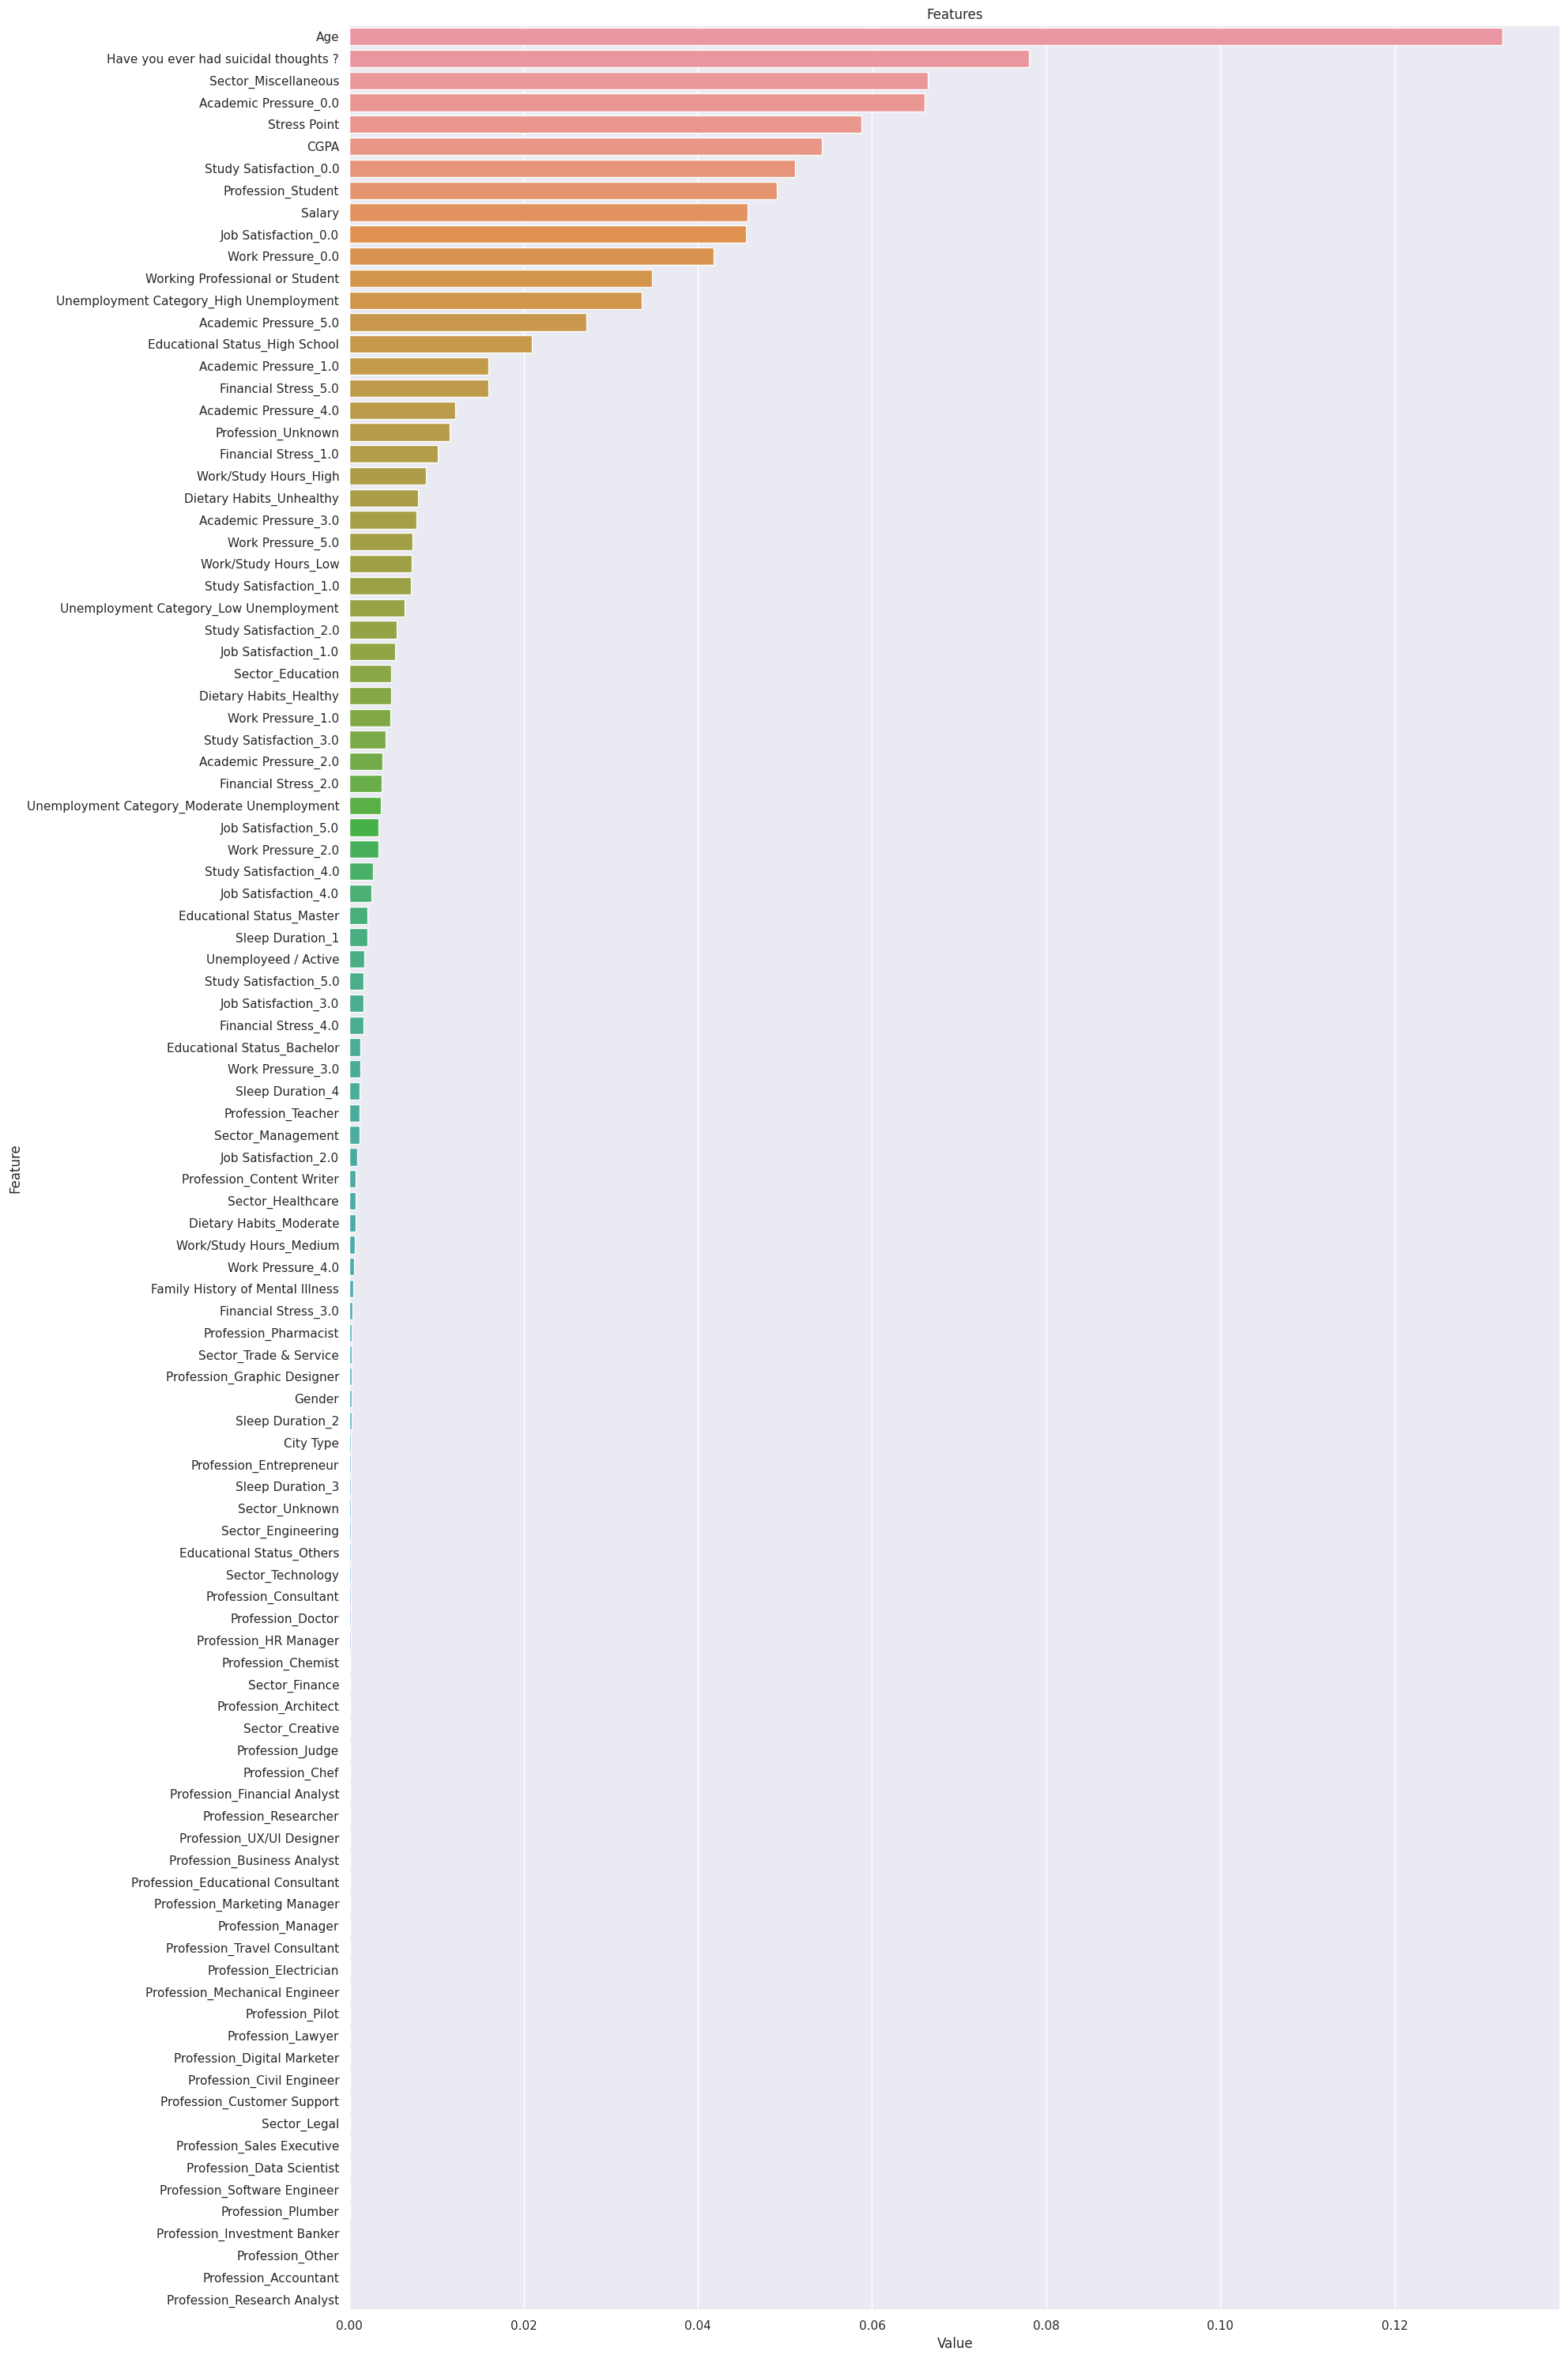

In [60]:
def plot_importance(model, features, dataframe, save=False):
    num = len(dataframe)
    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(20, 30))
    sns.set_theme(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

plot_importance(rf_final, X, df)

# Submission

In [61]:
df_test = df[df["Depression"].isnull()]

df_test.head()

,id,Name,Gender,Age,City,Working Professional or Student,CGPA,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression,Stress Point,City Type,Salary,Unemployeed / Active,Profession_Accountant,Profession_Architect,Profession_Business Analyst,Profession_Chef,Profession_Chemist,Profession_Civil Engineer,Profession_Consultant,Profession_Content Writer,Profession_Customer Support,Profession_Data Scientist,Profession_Digital Marketer,Profession_Doctor,Profession_Educational Consultant,Profession_Electrician,Profession_Entrepreneur,Profession_Financial Analyst,Profession_Graphic Designer,Profession_HR Manager,Profession_Investment Banker,Profession_Judge,Profession_Lawyer,Profession_Manager,Profession_Marketing Manager,Profession_Mechanical Engineer,Profession_Other,Profession_Pharmacist,Profession_Pilot,Profession_Plumber,Profession_Research Analyst,Profession_Researcher,Profession_Sales Executive,Profession_Software Engineer,Profession_Student,Profession_Teacher,Profession_Travel Consultant,Profession_UX/UI Designer,Profession_Unknown,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Unemployment Category_High Unemployment,Unemployment Category_Low Unemployment,Unemployment Category_Moderate Unemployment,Sector_Creative,Sector_Education,Sector_Engineering,Sector_Finance,Sector_Healthcare,Sector_Legal,Sector_Management,Sector_Miscellaneous,Sector_Technology,Sector_Trade & Service,Sector_Unknown,Educational Status_Bachelor,Educational Status_High School,Educational Status_Master,Educational Status_Others,Academic Pressure_0.0,Academic Pressure_1.0,Academic Pressure_2.0,Academic Pressure_3.0,Academic Pressure_4.0,Academic Pressure_5.0,Work Pressure_0.0,Work Pressure_1.0,Work Pressure_2.0,Work Pressure_3.0,Work Pressure_4.0,Work Pressure_5.0,Study Satisfaction_0.0,Study Satisfaction_1.0,Study Satisfaction_2.0,Study Satisfaction_3.0,Study Satisfaction_4.0,Study Satisfaction_5.0,Job Satisfaction_0.0,Job Satisfaction_1.0,Job Satisfaction_2.0,Job Satisfaction_3.0,Job Satisfaction_4.0,Job Satisfaction_5.0,Sleep Duration_1,Sleep Duration_2,Sleep Duration_3,Sleep Duration_4,Work/Study Hours_Low,Work/Study Hours_Medium,Work/Study Hours_High,Financial Stress_1.0,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0
0,140700,Shivam,1,0.667,Visakhapatnam,1,-1.000,0,1,NaN,-0.455,1,-0.200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0
1,140701,Sanya,0,0.905,Kolkata,1,-1.000,0,0,NaN,-0.273,1,-0.640,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
2,140702,Yash,1,0.667,Jaipur,1,-1.000,1,0,NaN,0.091,1,-0.760,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,140703,Nalini,0,-0.762,Rajkot,0,0.368,1,0,NaN,0.273,0,-1.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,140704,Shaurya,1,0.381,Kalyan,1,-1.000,1,0,NaN,0.273,0,-0.760,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0


In [62]:
df_test = df[df["Depression"].isnull()]

ids = df_test["id"]

X_test = df_test.drop(["id", "Depression", "Name", "City"], axis=1)
y_pred = rf_final.predict(X_test).astype(int)

results = pd.DataFrame({
    "id": ids,           
    "Depression": y_pred
})

results = results.reset_index(drop=True)

results.to_csv("depression_predictions.csv", index=False)

results.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0


In [63]:
results.shape

(93800, 2)